# Classification using Convolutional Neural Networks.

## Table of Contents
- [Theory](#theory)
    - [What is convolution?](#conv)
    - [Some examples](#conv_ex)
    - [Mathematical formulation](#conv_math)
    - [CNNs](#cnns)
    - [Layers](#conv_layers)
- [Torch Specific Layers](#torch_conv)
- [Image Classification](#im_cnn)
- [Something classification](#other_cnn)

## **Theory** <a class="anchor" id="theory"></a>

### **What is convolution?** <a class="anchor" id="conv"></a>

### **Some examples** <a class="anchor" id="conv_ex"></a>

### **Mathematical formulation** <a class="anchor" id="conv_math"></a>

### **CNNs** <a class="anchor" id="cnns"></a>

![CNN basic architecture](imgs/cnn.PNG "CNN basic architecture") Source: [link](https://miro.medium.com/v2/resize:fit:2000/format:webp/1*Vior6yy6_qN5rBv5Os0kGA.png)

### **Layers** <a class="anchor" id="conv_layers"></a>

## **Torch Specific Layers** <a class="anchor" id="torch_conv"></a>

## **Image Classification** <a class="anchor" id="im_cnn"></a>

### GTSRB dataset

The GTSRB (German Traffic Sign Recognition Benchmark) consists of images of traffic signs commonly encountered on roads in Germany. he dataset comprises 43 different classes, images in the dataset vary in terms of lighting conditions, weather, and viewpoints, and may contain variations in aspect ratio.

In [463]:
import torchvision
import torchvision.transforms as transforms

h, w = 32, 32

data_transform = data_transforms = transforms.Compose([
    transforms.Resize((h, w)),
    transforms.ToTensor(),
])

gtsrb_train = torchvision.datasets.GTSRB(root="./data", split="train", download=True, transform=data_transform)
gtsrb_test = torchvision.datasets.GTSRB(root="./data", split="test", download=True, transform=data_transform)

Images are already normalized $[0, 1]$. Original images have a wide range of resolutions, from $15 \times 15$ to $250 \times 250$ pixels. 

In [464]:
print("Train images: ", len(gtsrb_train), "Test images: ", len(gtsrb_test))

Train images:  26640 Test images:  12630


In [465]:
label_map = {
    0: 'Limitează la 20 km/h',
    1: 'Limitează la 30 km/h',
    2: 'Limitează la 50 km/h',
    3: 'Limitează la 60 km/h',
    4: 'Limitează la 70 km/h',
    5: 'Limitează la 80 km/h',
    6: 'Limitează la 80 km/h (fără restricție)',
    7: 'Limitează la 100 km/h',
    8: 'Limitează la 120 km/h',
    9: 'Interzis depășirea (în general)',
    10: 'Interzis depășirea camioanelor',
    11: 'Prioritate la trecerea pietonilor',
    12: 'Prioritate la intersecții (în general)',
    13: 'Cedează trecerea',
    14: 'Stop',
    15: 'Interzis accesul (în general)',
    16: 'Interzis accesul camioanelor',
    17: 'Circulație doar într-o direcție',
    18: 'Atenție (în general)',
    19: 'Atenție - Viraj la stânga',
    20: 'Atenție - Viraj la dreapta',
    21: 'Atenție - Drum sinuos',
    22: 'Atenție - Diferență de nivel',
    23: 'Atenție - Suprafața alunecoasă',
    24: 'Atenție - Îngustare de drum',
    25: 'Atenție - Lucrări pe drum',
    26: 'Atenție - Semáfor defect',
    27: 'Atenție - Trecere de pietoni',
    28: 'Atenție - Copii',
    29: 'Atenție - Bicicliști',
    30: 'Atenție - Zăpadă sau gheață',
    31: 'Atenție - Animale sălbatice',
    32: 'Sfârșitul restricțiilor (în general)',
    33: 'Viraj la dreapta',
    34: 'Viraj la stânga',
    35: 'Mergi drept',
    36: 'Mergi drept sau la dreapta',
    37: 'Mergi drept sau la stânga',
    38: 'Viraj la dreapta în jos',
    39: 'Viraj la stânga în jos',
    40: 'Sens giratoriu',
    41: 'Sfârșitul interdicției de depășire (în general)',
    42: 'Sfârșitul interdicției de depășire a camioanelor'
}

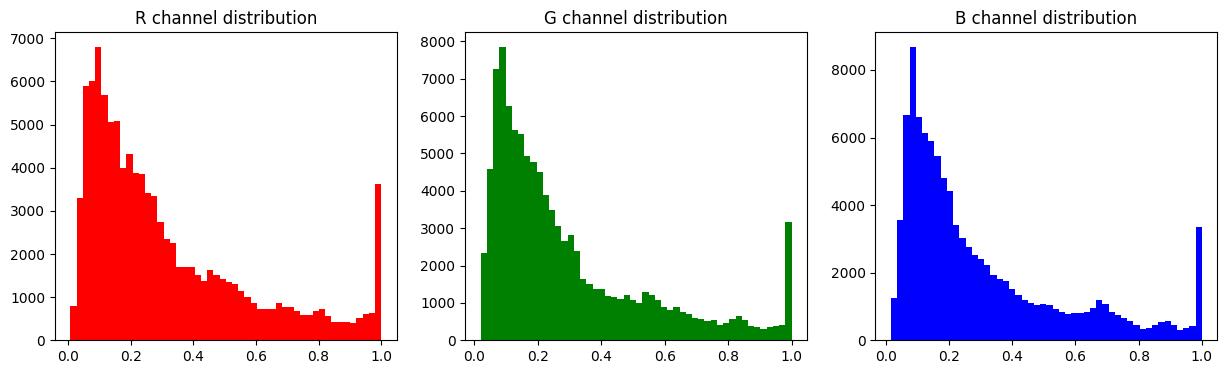

In [466]:
import numpy as np
import matplotlib.pyplot as plt

# Collect some data
data_rgb = [[], [], []]
num_samples = 100
for i in range(num_samples):
    im, target = gtsrb_test[i]

    data_rgb[0].append(im[0].numpy().flatten())
    data_rgb[1].append(im[1].numpy().flatten())
    data_rgb[2].append(im[2].numpy().flatten())

data_rgb[0] = np.array(data_rgb[0]).flatten()
data_rgb[1] = np.array(data_rgb[1]).flatten()
data_rgb[2] = np.array(data_rgb[2]).flatten()

plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
_ = plt.hist(data_rgb[0], color="red", bins=50)
_ = plt.title("R channel distribution")
plt.subplot(1, 3, 2)
_ = plt.hist(data_rgb[1], color="green", bins=50)
_ = plt.title("G channel distribution")
plt.subplot(1, 3, 3)
_ = plt.hist(data_rgb[2], color="blue", bins=50)
_ = plt.title("B channel distribution")

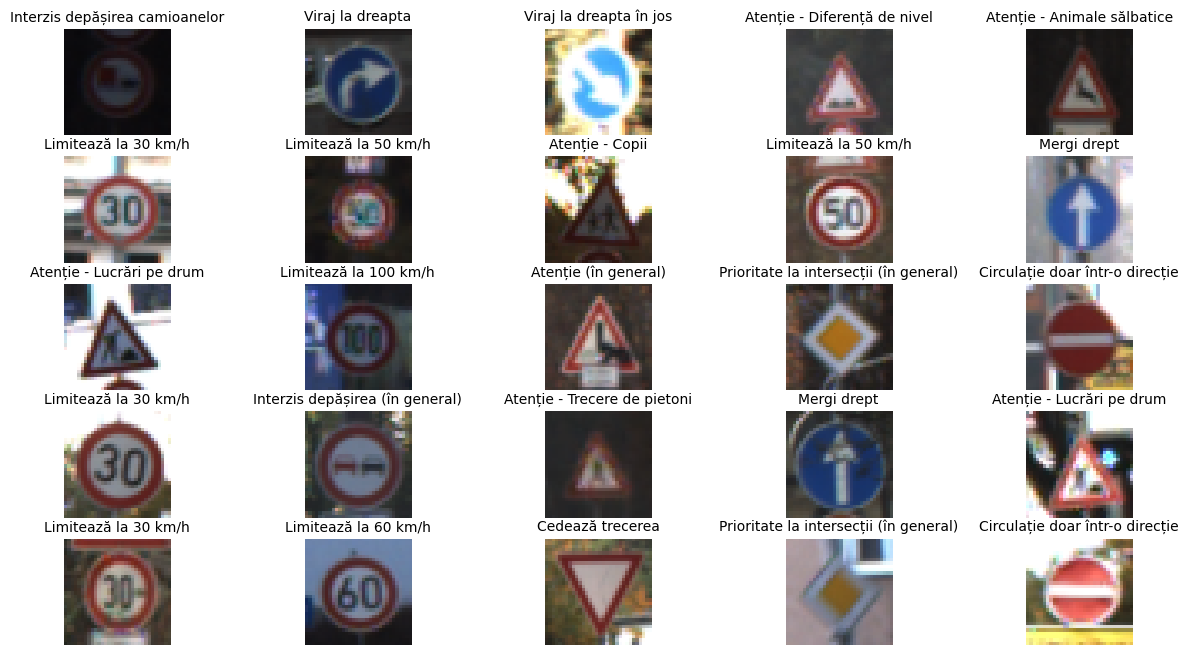

In [470]:
import importlib
import utils
importlib.reload(utils)
from utils import plot_random_images

plot_random_images(gtsrb_test, label_map, rows=5, columns=5)

#### <ins>Exercise</ins>: Check Class Distribution

In [471]:
# ***************************************************
# INSERT YOUR CODE HERE
# TODO: extract all targets from train/test datasets and get all unique values and their corresponding counts
test_targets = [y for x, y in gtsrb_test._samples]
train_targets = [y for x, y in gtsrb_train._samples]

unique_train, counts_train = np.unique(train_targets, return_counts=True)
unique_test, counts_test = np.unique(test_targets, return_counts=True)

assert len(unique_train) == len(unique_test), ValueError("Missing targets.")
# ***************************************************

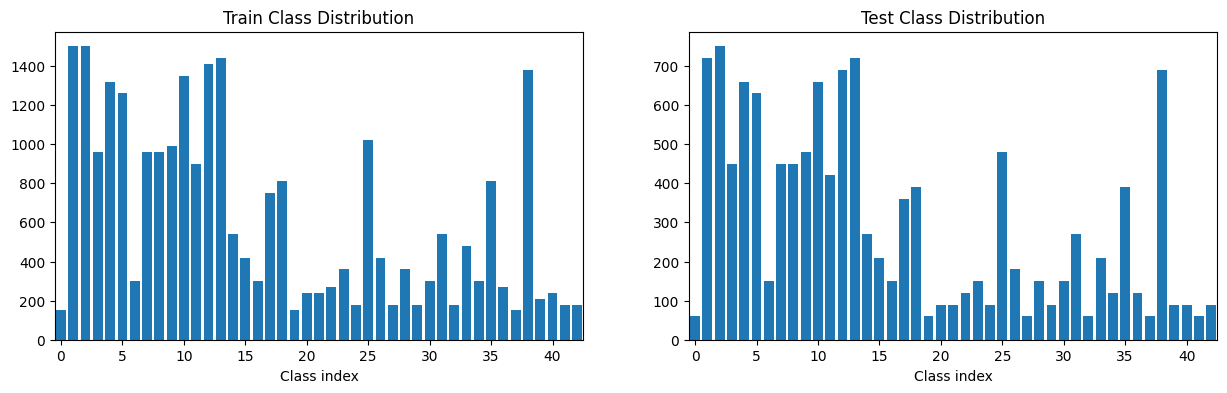

In [472]:
# ***************************************************
# INSERT YOUR CODE HERE
# TODO: bar plot/histogram to visualize the distribution of classes
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.title("Train Class Distribution")
plt.bar(unique_train, counts_train)
plt.xlim([min(unique_train) - 0.5, max(unique_train) + 0.5])
plt.xlabel("Class index")
plt.subplot(1, 2, 2)
plt.title("Test Class Distribution")
plt.bar(unique_test, counts_test)
plt.xlim([min(unique_test) - 0.5, max(unique_test) + 0.5])
_ = plt.xlabel("Class index")
# ***************************************************

Quite imbalanced dataset, but train and test distributions seem roughly the same.

### Define CNN model class

In [473]:
import torch
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self, in_ch, n_classes, *args, **kwargs):
        super(SimpleCNN, self).__init__(*args, **kwargs)

        self.conv_sequence = nn.Sequential(
            nn.Conv2d(in_ch, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
        )

        self.global_pool = nn.AdaptiveMaxPool2d(1)

        self.dense_sequence = nn.Sequential(
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, n_classes)
        )
    
    def forward(self, x):
        z1 = self.conv_sequence(x)
        z2 = self.global_pool(z1).view(z1.size(0), -1)
        z3 = self.dense_sequence(z2)

        return z3

#### <ins>Exercise</ins>: write a generic CNN class for classification tasks, given the following requirements:
- We can create a network with an arbitrary number of Conv2d layers
- The choice of pooling operators, after each Conv2d, is controlled by the user
- We can create a network with an arbitrary number of Linear layers, that succeed the convolutional sequence

In [474]:
# ***************************************************
# INSERT YOUR CODE HERE
# TODO: write a CNN class, given the above requirements

# ***************************************************

In [475]:
from torchsummary import summary

model = SimpleCNN(in_ch=3, n_classes=43)

summary(model, (3, 64, 64), device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 64, 64]             448
              ReLU-2           [-1, 16, 64, 64]               0
            Conv2d-3           [-1, 32, 64, 64]           4,640
              ReLU-4           [-1, 32, 64, 64]               0
         MaxPool2d-5           [-1, 32, 32, 32]               0
            Conv2d-6           [-1, 64, 32, 32]          18,496
              ReLU-7           [-1, 64, 32, 32]               0
         MaxPool2d-8           [-1, 64, 16, 16]               0
            Conv2d-9          [-1, 128, 16, 16]          73,856
             ReLU-10          [-1, 128, 16, 16]               0
AdaptiveMaxPool2d-11            [-1, 128, 1, 1]               0
           Linear-12                   [-1, 64]           8,256
             ReLU-13                   [-1, 64]               0
           Linear-14                   

**Number of total parameters doesn't change with the input height/width! Why?**

### Training

In [476]:
batch_size = 128
epochs = 10
lr = 1e-3
print_frequency = 1

optimizer = torch.optim.Adam(model.parameters(), lr=lr)
loss = nn.CrossEntropyLoss()

In [477]:
from torch.utils.data import DataLoader

gtsrb_train_loader = DataLoader(gtsrb_train, batch_size=batch_size, shuffle=True)
gtsrb_test_loader = DataLoader(gtsrb_test, batch_size=batch_size, shuffle=False)

In [478]:
print(f"N.o. train batches: {len(gtsrb_train_loader)}. N.o. test batches: {len(gtsrb_test_loader)}")

N.o. train batches: 209. N.o. test batches: 99


In [479]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(f"Using {device}.")

Using cuda.


Pre-load train/test loader, s.t. we don't have to do it every epoch.

In [480]:
import os
from tqdm import tqdm
import torch_utils
importlib.reload(torch_utils)

# Define root folder and file_name for saving
folder_path = "models/gtsrb"
file_name = "model.pth"

_ torch_utils.train_loop(
    model, 
    train_loader=gtsrb_train_loader, 
    optimizer=optimizer, 
    loss=loss, 
    epochs=epochs, 
    test_loader=gtsrb_test_loader, 
    device=device, 
    folder_path=folder_path, 
    file_name=file_name,
)

100%|███████████████████████████████████████████████████████████████████████████| 99/99 [00:08<00:00, 11.81it/s]


Epoch 1/10: train_loss=0.7769719958305359 train_acc=0.7986861861861861 test_loss=1.6634996166132918 test_acc=0.6401425178147269


100%|███████████████████████████████████████████████████████████████████████████| 99/99 [00:09<00:00, 10.96it/s]


Epoch 2/10: train_loss=0.4393681679901324 train_acc=0.8692192192192192 test_loss=1.4179306560092502 test_acc=0.6828186856690419


100%|███████████████████████████████████████████████████████████████████████████| 99/99 [00:11<00:00,  8.62it/s]


Epoch 3/10: train_loss=0.3529101459033181 train_acc=0.8938438438438439 test_loss=1.499221469416763 test_acc=0.6997624703087886


100%|███████████████████████████████████████████████████████████████████████████| 99/99 [00:08<00:00, 11.15it/s]


Epoch 4/10: train_loss=0.2713496354564525 train_acc=0.9171921921921922 test_loss=1.2649207837653882 test_acc=0.751464766429137


100%|███████████████████████████████████████████████████████████████████████████| 99/99 [00:07<00:00, 12.50it/s]


Epoch 5/10: train_loss=0.21773743725707087 train_acc=0.9350975975975976 test_loss=1.5491450705913583 test_acc=0.731353919239905


100%|███████████████████████████████████████████████████████████████████████████| 99/99 [00:09<00:00, 10.45it/s]


Epoch 6/10: train_loss=0.20679447279449856 train_acc=0.9367867867867868 test_loss=1.4143235207808138 test_acc=0.7422011084718924


100%|███████████████████████████████████████████████████████████████████████████| 99/99 [00:08<00:00, 11.95it/s]


Epoch 7/10: train_loss=0.15042061192923756 train_acc=0.9527777777777777 test_loss=1.4214984473555978 test_acc=0.7541567695961995


100%|███████████████████████████████████████████████████████████████████████████| 99/99 [00:08<00:00, 11.50it/s]


Epoch 8/10: train_loss=0.1396908359156485 train_acc=0.9561561561561561 test_loss=1.2261146602004465 test_acc=0.8002375296912114


100%|███████████████████████████████████████████████████████████████████████████| 99/99 [00:08<00:00, 11.19it/s]


Epoch 9/10: train_loss=0.09505906285780469 train_acc=0.9710585585585586 test_loss=1.4239358540737268 test_acc=0.7832145684877276


100%|███████████████████████████████████████████████████████████████████████████| 99/99 [00:07<00:00, 12.44it/s]

Epoch 10/10: train_loss=0.12160135843037989 train_acc=0.962987987987988 test_loss=1.2665875885221693 test_acc=0.7841646872525733


([0.7769719958305359,
  0.4393681679901324,
  0.3529101459033181,
  0.2713496354564525,
  0.21773743725707087,
  0.20679447279449856,
  0.15042061192923756,
  0.1396908359156485,
  0.09505906285780469,
  0.12160135843037989],
 [1.6634996166132918,
  1.4179306560092502,
  1.499221469416763,
  1.2649207837653882,
  1.5491450705913583,
  1.4143235207808138,
  1.4214984473555978,
  1.2261146602004465,
  1.4239358540737268,
  1.2665875885221693])

#### Inspecting Confusion Matrix

In [481]:
import torch_utils
importlib.reload(torch_utils)

# load best model
model.load_state_dict(
    torch.load(
        os.path.join(folder_path, file_name)
    )["state_dict"]
)
model.to(device)

# get test predictions
y_train, y_train_pred = torch_utils.get_prediction_targets(model, gtsrb_train_loader, device=device)
y_test, y_test_pred = torch_utils.get_prediction_targets(model, gtsrb_test_loader, device=device)

100%|███████████████████████████████████████████████████████████████████████████| 99/99 [01:41<00:00,  1.03s/it]


In [482]:
assert y_train.shape == y_train_pred.shape
assert y_test.shape == y_test_pred.shape

In [483]:
from sklearn.metrics import confusion_matrix

train_cm = confusion_matrix(y_train, y_train_pred, normalize="true")
test_cm = confusion_matrix(y_test, y_test_pred, normalize="true")

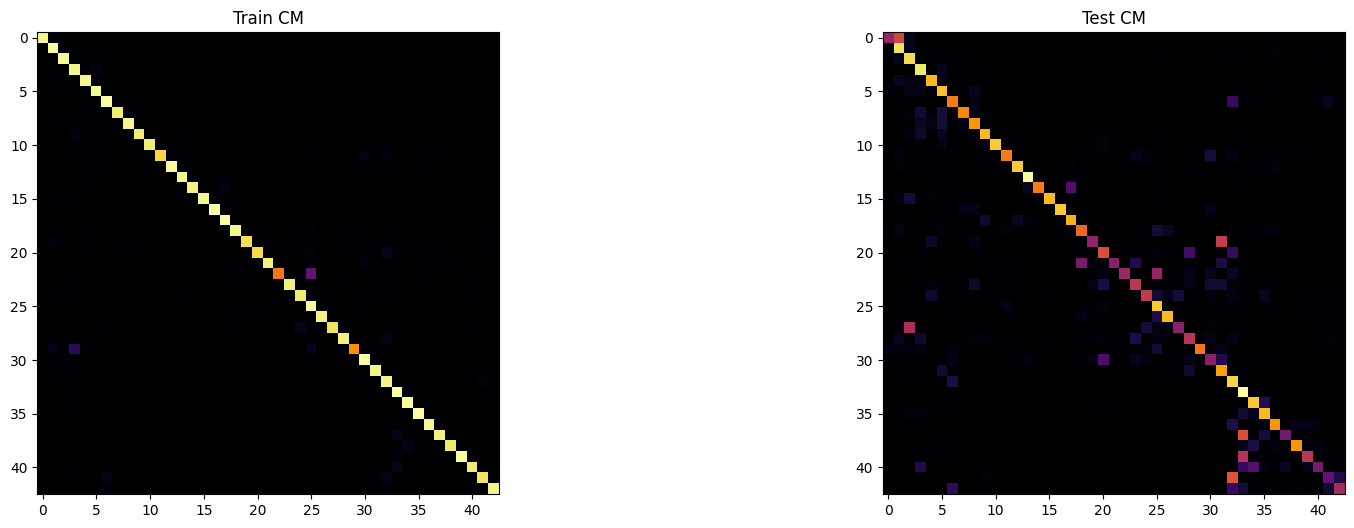

In [484]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.title("Train CM")
plt.imshow(train_cm, cmap="inferno")
plt.subplot(1, 2, 2)
plt.title("Test CM")
_ = plt.imshow(test_cm, cmap="inferno")

### Visualizing Region Importance

In [485]:
try:
    import pytorch_grad_cam 
except:
    !pip install grad-cam

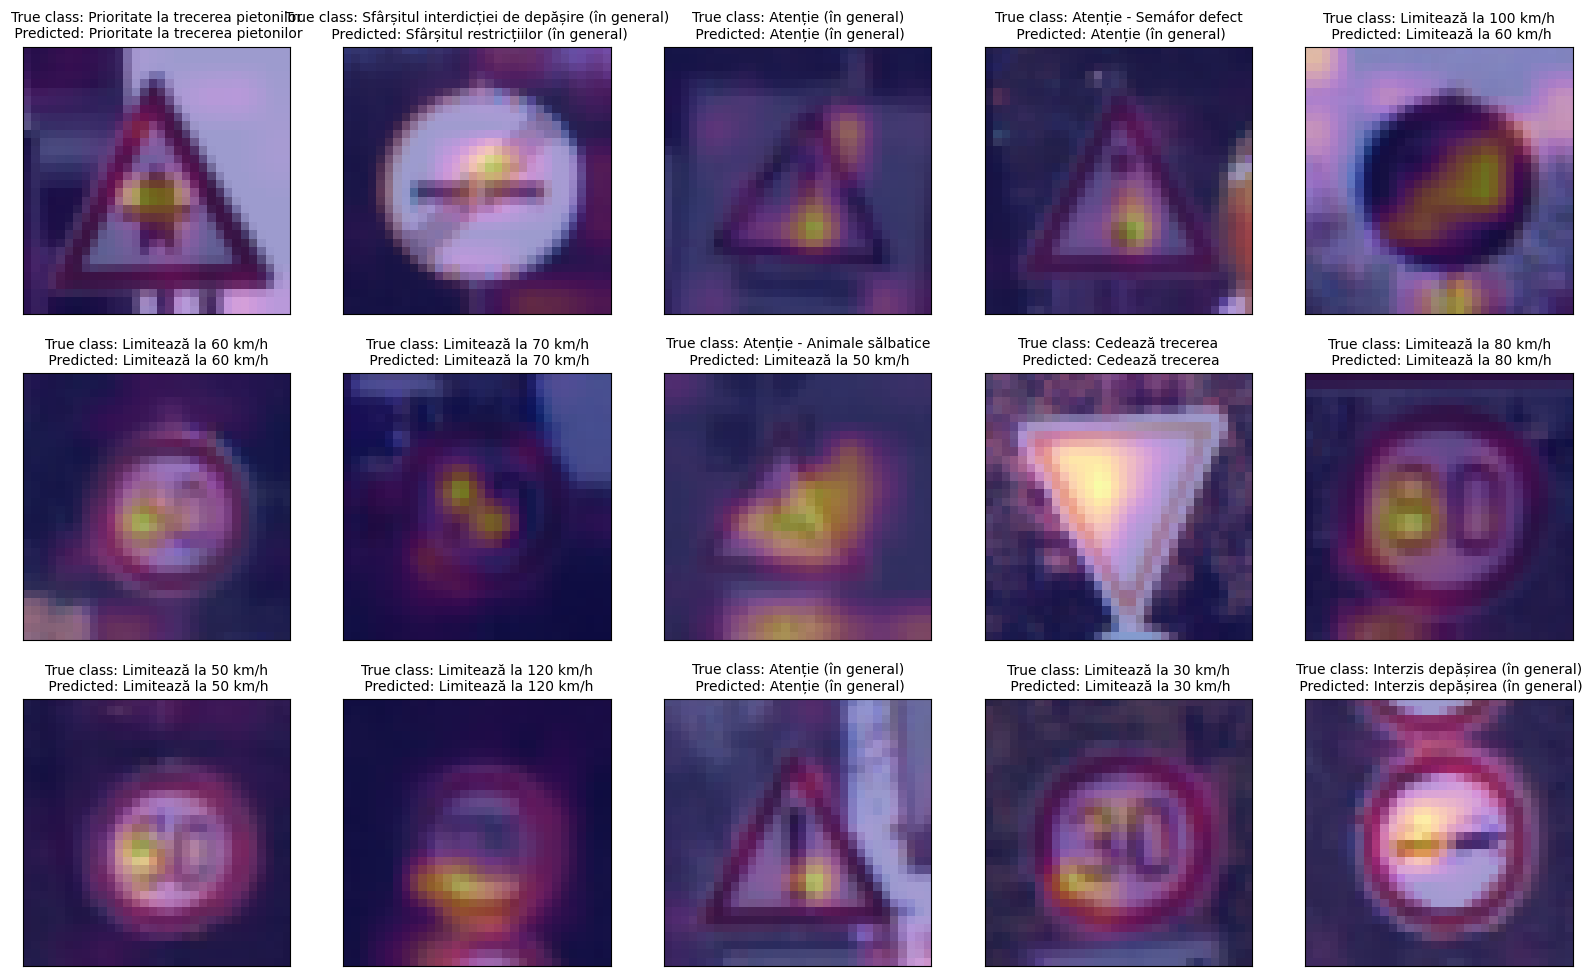

In [490]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
importlib.reload(utils)

n_rows = 3
n_cols = 5
i = 1

plt.figure(figsize=(20, n_rows * 4))

target_layers = [model.conv_sequence[-1]]
gradcam = GradCAM(model, target_layers)

for images, targets in gtsrb_test_loader:
    idx = np.random.randint(0, images.shape[0])

    image = images[idx][None, ...]
    target = targets[idx][None, ...]
    target_prep = [ClassifierOutputTarget(target)]
    
    heatmap = gradcam(input_tensor=image, targets=target_prep, aug_smooth=False)

    predicted = torch.argmax(model(image.to(device)), dim=1)[0]

    plt.subplot(n_rows, n_cols, i)
    plt.title(f"True class: {label_map[target.data.numpy()[0]]}\n Predicted: {label_map[predicted.cpu().tolist()]}", fontdict={"fontsize": 10})
    utils.plot_image_with_heatmap_overlay(image[0], heatmap[0], alpha=0.4)

    i += 1
    if i > n_rows * n_cols:
        break
plt.show()

### Transfer Learning (TL) / Fine-Tuning

**Transfer learning** is technique where a model trained on one task is adapted for a second related task. It involves the following stages:
1. Select a pre-trained model $T(\cdot)$ that was trained on a large source dataset $\mathbb{S}$, relevant to your problem (or not)
2. Remove the Final Layer(s)
3. Add Task-specific Layers - e.g. for classification, a final Linear layer with #neurons = #classes $\rightarrow$ new model $T'(\cdot)$
4. (Optional) Freeze the weights of pre-trained layers $\rightarrow$ $T'_❄️(\cdot)$
5. Train $T'_❄️(\cdot)$ for some epochs (usually, only the newly added final layer is updated) on the current desired dataset $\mathbb{D}$
6. (Optional) Fine-tune $T'_❄️(\cdot)$:
   - Unfreeze all layers $\rightarrow$ $T'_🔥(\cdot)$
   - Train $T'_🔥(\cdot)$ for a number of epochs on $\mathbb{D}$

**TL** is particularly useful when either of the following: 
- dataset $\mathbb{D}$ is limited;
- we don't have enough computational resources to train $T(\cdot)$ from scratch;
- the domains of source and target tasks are roughly similar.

We'll use the pre-trained models from `torchvision.models`, but you can try other alternatives, such as [HuggingFace](https://huggingface.co/docs/transformers/model_doc/mobilenet_v1). 

#### Step 1: load pre-trained model

In [492]:
from torchvision.models import squeezenet1_0

squeezenet = squeezenet1_0(pretrained=True)

#### Step 2: check the architecture

In [493]:
summary(squeezenet, (3, 32, 32), device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 96, 13, 13]          14,208
              ReLU-2           [-1, 96, 13, 13]               0
         MaxPool2d-3             [-1, 96, 6, 6]               0
            Conv2d-4             [-1, 16, 6, 6]           1,552
              ReLU-5             [-1, 16, 6, 6]               0
            Conv2d-6             [-1, 64, 6, 6]           1,088
              ReLU-7             [-1, 64, 6, 6]               0
            Conv2d-8             [-1, 64, 6, 6]           9,280
              ReLU-9             [-1, 64, 6, 6]               0
             Fire-10            [-1, 128, 6, 6]               0
           Conv2d-11             [-1, 16, 6, 6]           2,064
             ReLU-12             [-1, 16, 6, 6]               0
           Conv2d-13             [-1, 64, 6, 6]           1,088
             ReLU-14             [-1, 6

The final `Sequential` can be accessed by `squeezenet.classifier`. We'll modify this to fit out task.

<ins>Obs.</ins>: Other pre-trained models have different output structure. E.g., the output of `resnet18` can be accessed through `resnet18.fc`.

#### Step 3: freeze the model's parameters

In [494]:
for param in squeezenet.parameters():
    param.requires_grad = False

#### Step 4: replace the final layer with something fit for the current task, and check the new architecture

In [495]:
squeezenet.classifier

Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Conv2d(512, 1000, kernel_size=(1, 1), stride=(1, 1))
  (2): ReLU(inplace=True)
  (3): AdaptiveAvgPool2d(output_size=(1, 1))
)

In [496]:
squeezenet.classifier = nn.Conv2d(512, 43, 1, 1)
squeezenet.classifier

Conv2d(512, 43, kernel_size=(1, 1), stride=(1, 1))

In [497]:
summary(squeezenet, (3, 32, 32), device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 96, 13, 13]          14,208
              ReLU-2           [-1, 96, 13, 13]               0
         MaxPool2d-3             [-1, 96, 6, 6]               0
            Conv2d-4             [-1, 16, 6, 6]           1,552
              ReLU-5             [-1, 16, 6, 6]               0
            Conv2d-6             [-1, 64, 6, 6]           1,088
              ReLU-7             [-1, 64, 6, 6]               0
            Conv2d-8             [-1, 64, 6, 6]           9,280
              ReLU-9             [-1, 64, 6, 6]               0
             Fire-10            [-1, 128, 6, 6]               0
           Conv2d-11             [-1, 16, 6, 6]           2,064
             ReLU-12             [-1, 16, 6, 6]               0
           Conv2d-13             [-1, 64, 6, 6]           1,088
             ReLU-14             [-1, 6

Check which parameters are set to learnable:

In [498]:
for name, param in squeezenet.named_parameters():
    if param.requires_grad:
        print(name, param.shape)

classifier.weight torch.Size([43, 512, 1, 1])
classifier.bias torch.Size([43])


#### Step 5: Define train config

In [503]:
batch_size = 128
epochs_freezed = 5
epochs_unfreezed = 5
lr_freezed = 1e-3
lr_unfreezed = 1e-4
print_frequency = 1

optimizer = torch.optim.Adam(squeezenet.parameters(), lr=lr_freezed)
loss = nn.CrossEntropyLoss()

# Define root folder and file_name for saving
folder_path_tl = "models_tl/gtsrb_squeezenet"
file_name_freeze = "model_freeze.pth"
file_name_unfreeze = "model_unfreeze.pht"

#### Step 6: Pre-Train freezed model 

In [505]:
_ = torch_utils.train_loop(
    squeezenet, 
    train_loader=gtsrb_train_loader, 
    optimizer=optimizer, 
    loss=loss, 
    epochs=epochs_freezed, 
    test_loader=gtsrb_test_loader, 
    device=device, 
    folder_path=folder_path_tl, 
    file_name=file_name_freeze,
)

100%|███████████████████████████████████████████████████████████████████████████| 99/99 [00:07<00:00, 12.65it/s]


Epoch 1/5: train_loss=0.0010688875670994138 train_acc=0.9996996996996997 test_loss=0.5343730802638362 test_acc=0.9290577988915281


100%|███████████████████████████████████████████████████████████████████████████| 99/99 [00:07<00:00, 13.10it/s]


Epoch 2/5: train_loss=0.001018870505171681 train_acc=0.9996621621621622 test_loss=0.5331814109978049 test_acc=0.930166270783848


100%|███████████████████████████████████████████████████████████████████████████| 99/99 [00:07<00:00, 13.61it/s]


Epoch 3/5: train_loss=0.0008845012778129224 train_acc=0.9998873873873874 test_loss=0.5548732641218889 test_acc=0.927870150435471


100%|███████████████████████████████████████████████████████████████████████████| 99/99 [00:07<00:00, 13.10it/s]


Epoch 4/5: train_loss=0.0009219968219647192 train_acc=0.9996996996996997 test_loss=0.56661492766756 test_acc=0.9274742676167854


100%|███████████████████████████████████████████████████████████████████████████| 99/99 [00:06<00:00, 14.51it/s]


Epoch 5/5: train_loss=0.000796539458156783 train_acc=0.9998498498498498 test_loss=0.5640004113918603 test_acc=0.9287410926365796


#### Step 6: Unfreeze and Fine-tune

In [506]:
squeezenet.load_state_dict(
    torch.load(
        os.path.join(folder_path_tl, file_name_freeze)
    )["state_dict"]
)
_ = squeezenet.to(device)

In [507]:
for param in squeezenet.parameters():
    param.requires_grad = True

optimizer = torch.optim.Adam(squeezenet.parameters(), lr=lr_unfreezed)

In [508]:
_ = torch_utils.train_loop(
    squeezenet, 
    train_loader=gtsrb_train_loader, 
    optimizer=optimizer, 
    loss=loss, 
    epochs=epochs_unfreezed, 
    test_loader=gtsrb_test_loader, 
    device=device, 
    folder_path=folder_path_tl, 
    file_name=file_name_unfreeze,
)

Couldn't load model


100%|███████████████████████████████████████████████████████████████████████████| 99/99 [00:06<00:00, 14.16it/s]


Epoch 1/5: train_loss=0.005233795569624812 train_acc=0.9983108108108109 test_loss=0.6393111122376991 test_acc=0.9273950910530483


100%|███████████████████████████████████████████████████████████████████████████| 99/99 [00:07<00:00, 13.04it/s]


Epoch 2/5: train_loss=0.0025406849097391166 train_acc=0.9992867867867868 test_loss=0.574565704272251 test_acc=0.930166270783848


100%|███████████████████████████████████████████████████████████████████████████| 99/99 [00:07<00:00, 13.31it/s]


Epoch 3/5: train_loss=0.0005317775401458698 train_acc=0.9999249249249249 test_loss=0.5783287803030978 test_acc=0.935471100554236


100%|███████████████████████████████████████████████████████████████████████████| 99/99 [00:07<00:00, 12.73it/s]


Epoch 4/5: train_loss=0.004154032720680823 train_acc=0.9987237237237238 test_loss=0.6894419262505541 test_acc=0.9239904988123515


100%|███████████████████████████████████████████████████████████████████████████| 99/99 [00:07<00:00, 12.74it/s]

Epoch 5/5: train_loss=0.004987718647172866 train_acc=0.9986486486486487 test_loss=0.6189903997712665 test_acc=0.9253365003958828


#### Plot CM

In [509]:
import torch_utils
importlib.reload(torch_utils)

# load best model
squeezenet.load_state_dict(
    torch.load(
        os.path.join(folder_path_tl, file_name_unfreeze)
    )["state_dict"]
)

# get test predictions
y_train, y_train_pred = torch_utils.get_prediction_targets(squeezenet, gtsrb_train_loader, device=device)
y_test, y_test_pred = torch_utils.get_prediction_targets(squeezenet, gtsrb_test_loader, device=device)

100%|███████████████████████████████████████████████████████████████████████████| 99/99 [00:07<00:00, 13.50it/s]


In [510]:
test_cm_squeeze = confusion_matrix(y_test, y_test_pred, normalize="true")

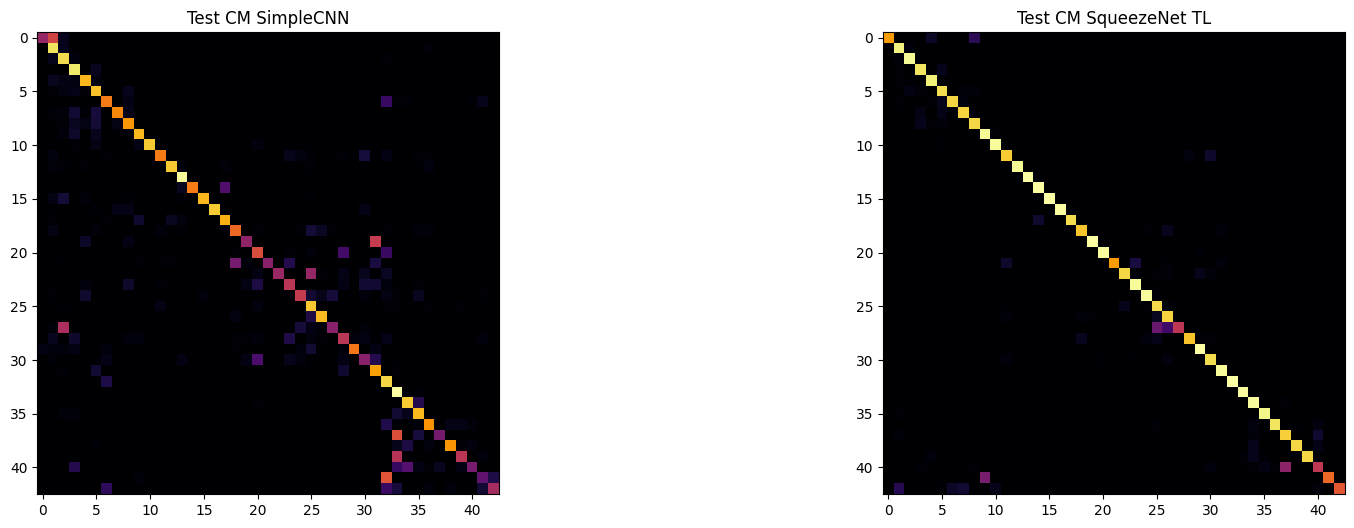

In [511]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.title("Test CM SimpleCNN")
plt.imshow(test_cm, cmap="inferno")
plt.subplot(1, 2, 2)
plt.title("Test CM SqueezeNet TL")
_ = plt.imshow(test_cm_squeeze, cmap="inferno")

In [518]:
# ***************************************************
# INSERT YOUR CODE HERE
# TODO: write a function to compute per-class accuracy and precision
def compute_metrics_from_cm(conf_matrix):
    per_class_acc = np.diag(conf_matrix)
    per_class_prec = np.diag(conf_matrix) / conf_matrix.sum(axis=0)

    return per_class_acc, per_class_prec
# *************************************************** 

In [519]:
acc_simple, prec_simple = compute_metrics_from_cm(test_cm)
acc_squeeze, prec_squeeze = compute_metrics_from_cm(test_cm_squeeze)

In [541]:
import pandas as pd

df = pd.DataFrame({
    "Class": label_map.values(),
    "Simple CNN Accuracy": acc_simple,
    "Simple CNN Precision": prec_simple,
    "SqueezeNet Accuracy": acc_squeeze,
    "SqueezeNet Precision": prec_squeeze
})

df_overall  = pd.DataFrame({"Class": ["Overall Performance"],
                            "Simple CNN Accuracy": [np.mean(acc_simple)],
                            "Simple CNN Precision": [np.mean(prec_simple)],
                            "SqueezeNet Accuracy": [np.mean(acc_squeeze)],
                            "SqueezeNet Precision": [np.mean(prec_squeeze)]
                           })

line = [':------------------------']
df = pd.concat([df, 
                pd.DataFrame({
                    'Class': line,
                    "Simple CNN Accuracy": line,
                    "Simple CNN Precision": line,
                    "SqueezeNet Accuracy": line,
                    "SqueezeNet Precision": line
                }),
                df_overall], 
               ignore_index=True)

df_markdown = df.to_markdown(index=False)

In [542]:
print(df_markdown)

| Class                                            | Simple CNN Accuracy       | Simple CNN Precision      | SqueezeNet Accuracy       | SqueezeNet Precision      |
|:-------------------------------------------------|:--------------------------|:--------------------------|:--------------------------|:--------------------------|
| Limitează la 20 km/h                             | 0.4                       | 0.9023070350327542        | 0.7833333333333333        | 0.9982300884955753        |
| Limitează la 30 km/h                             | 0.9083333333333333        | 0.4946092663327649        | 0.9638888888888889        | 0.8018575090939529        |
| Limitează la 50 km/h                             | 0.896                     | 0.5117534971433779        | 0.9813333333333333        | 0.9283925201812515        |
| Limitează la 60 km/h                             | 0.9244444444444444        | 0.6041030999908404        | 0.9333333333333333        | 0.8870038960172436        |
| Limiteaz

#### Save the entire model for next Lab ...

In [552]:
torch.save(squeezenet, os.path.join(folder_path_tl, "full_finetuned_mode.pht"))

## **Something Classification** <a class="anchor" id="other_cnn"></a>